# code taken from https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime

In [2]:
# test= pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
test=pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [24]:
# my_data_1=test_new.loc[500:9999,['dateTime','AEWIHOAVABV2','AEDATZ_HO_V0','RWWIHOA_HWT0','AEDAHO_T9_V2']]
my_data_1=test_new.loc[500:9999,['dateTime','AEDAHO_T9_V2']]

In [25]:
my_data_1 = my_data_1.set_index('dateTime')

In [26]:
my_data_1=my_data_1.loc[::-1]

In [27]:
my_data=np.array(my_data_1)

In [28]:
my_data

array([[71.07934514],
       [70.70649495],
       [70.28999611],
       ...,
       [42.343193  ],
       [42.48031501],
       [42.30518655]])

In [29]:
# my_data=my_data_1.as_matrix()

In [34]:
train_data_vanilla=my_data[0:7500]
print(train_data_vanilla.shape)
test_data_vanilla=my_data[7500:]
print(test_data_vanilla.shape)

(7500, 1)
(2000, 1)


# Vanilla LSTM for Univariate TimeSeries Data

In [62]:
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    print(len(sequence))
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
#         print(X,'\t',y)
    return array(X), array(y)
 
# define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 1
# split into samples
X_train_vanilla, y_train_vanilla = split_sequence(train_data_vanilla, n_steps)
print(X.shape,'\t',X.ndim,'\t',X.size)
print(y.shape,'\t',y.ndim,'\t',y.size)
# summarize the data
# for i in range(len(X)):
# 	print(X[i], y[i])

7500
(7497, 3, 1) 	 3 	 22491
(7497, 1) 	 2 	 7497


In [63]:
n_features = 1
X_train_vanilla = X_train_vanilla.reshape((X_train_vanilla.shape[0], X_train_vanilla.shape[1], n_features))

In [64]:
# print(X[0])

In [65]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
model.fit(X_train_vanilla, y_train_vanilla, epochs=10, verbose=1)

Epoch 1/10
7499/7499 [==============================] - 2s 215us/step - loss: 1679.8673 - acc: 5.3340e-04
Epoch 2/10
7499/7499 [==============================] - 0s 62us/step - loss: 26.6850 - acc: 4.0005e-04
Epoch 3/10
7499/7499 [==============================] - 0s 63us/step - loss: 23.1221 - acc: 4.0005e-04
Epoch 4/10
7499/7499 [==============================] - 0s 63us/step - loss: 23.1178 - acc: 4.0005e-04
Epoch 5/10
7499/7499 [==============================] - 0s 65us/step - loss: 23.1157 - acc: 4.0005e-04
Epoch 6/10
7499/7499 [==============================] - 0s 64us/step - loss: 23.1157 - acc: 4.0005e-04
Epoch 7/10
7499/7499 [==============================] - 0s 64us/step - loss: 23.1148 - acc: 4.0005e-04
Epoch 8/10
7499/7499 [==============================] - 1s 127us/step - loss: 23.1175 - acc: 4.0005e-04
Epoch 9/10
7499/7499 [==============================] - 0s 66us/step - loss: 23.1048 - acc: 4.0005e-04
Epoch 10/10
7499/7499 [==============================] - 0s 63us/step

In [ ]:
# demonstrate prediction
# x_input = array([70, 80, 90])
# x_input = X[-1].reshape((1, n_steps, n_features)) # imp for single test input

In [66]:
test_ip_vanilla,test_op_vanilla=split_sequence(test_data_vanilla,n_steps)
X_test_ip_vanilla=test_ip_vanilla.reshape((test_ip_vanilla.shape[0], test_ip_vanilla.shape[1], n_features))

2000


In [67]:
yhat = model.predict(X_test_ip_vanilla, verbose=1)
print(yhat)

1999/1999 [==============================] - 0s 139us/step
[[62.80837 ]
 [61.811043]
 [59.11922 ]
 ...
 [37.555115]
 [37.893627]
 [38.092384]]


In [ ]:
# print(y[-10:-1])

In [ ]:
# print(y[-10:-1])

In [ ]:
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# print(type(raw_seq))
# raw_seq=np.array(raw_seq)
# print(type(raw_seq))
# print(raw_seq[0:5])
# print(raw_seq[-1])

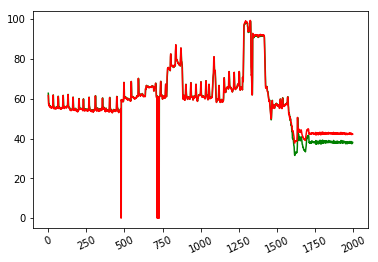

In [68]:
# my_data_1.index[0:-1]
plt.plot(yhat,color='green')
plt.plot(test_op_vanilla,color='red')
plt.xticks( rotation=25)
plt.show()

In [ ]:
# print(my_data_1.index[0:])

In [69]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_op_vanilla,yhat)
print(Error)

23.38055741959918


# Stacked LSTM Univariate TimeSeries Data

In [52]:
train_data_stacked=my_data[0:7500]
print(train_data_stacked.shape)
test_data_stacked=my_data[7500:]
print(test_data_stacked.shape)

(7500, 1)
(2000, 1)


In [55]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

n_steps_stack=3

# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

X_train_stack,y_train_stack=split_sequence(train_data_stacked,n_steps_stack)

In [56]:
n_features_stack = 1
X_train_stack = X_train_stack.reshape((X_train_stack.shape[0], X_train_stack.shape[1], n_features_stack))

In [70]:
def stack_lstm():
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_stack, n_features_stack)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    
    return model
stack_lstm=stack_lstm()

stack_lstm.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
stack_lstm.fit(X_train_stack, y_train_stack, epochs=10, verbose=1)
# demonstrate prediction
# x_input = array([70, 80, 90])
# x_input = x_input.reshape((1, n_steps, n_features))

Epoch 1/10
7497/7497 [==============================] - 3s 375us/step - loss: 409.7430 - acc: 1.3339e-04
Epoch 2/10
7497/7497 [==============================] - 1s 157us/step - loss: 24.1804 - acc: 0.0000e+00
Epoch 3/10
7497/7497 [==============================] - 1s 159us/step - loss: 23.8303 - acc: 0.0000e+00
Epoch 4/10
7497/7497 [==============================] - 1s 162us/step - loss: 22.7277 - acc: 0.0000e+00
Epoch 5/10
7497/7497 [==============================] - 1s 160us/step - loss: 21.2407 - acc: 0.0000e+00
Epoch 6/10
7497/7497 [==============================] - 1s 190us/step - loss: 18.6261 - acc: 0.0000e+00
Epoch 7/10
7497/7497 [==============================] - 1s 198us/step - loss: 16.2746 - acc: 0.0000e+00
Epoch 8/10
7497/7497 [==============================] - 1s 173us/step - loss: 15.3458 - acc: 0.0000e+00
Epoch 9/10
7497/7497 [==============================] - 1s 170us/step - loss: 14.7911 - acc: 0.0000e+00
Epoch 10/10
7497/7497 [==============================] - 1s 169

In [71]:
test_ip_stack,test_op_stack=split_sequence(test_data_stacked,n_steps_stack)
X_test_ip_stack=test_ip_stack.reshape((test_ip_stack.shape[0], test_ip_stack.shape[1], n_features_stack))

2000


In [72]:
yhat_stack_lstm = stack_lstm.predict(X_test_ip_stack, verbose=1)
print(yhat_stack_lstm)

1997/1997 [==============================] - 0s 220us/step
[[60.631657]
 [59.22145 ]
 [58.929863]
 ...
 [43.161144]
 [43.247345]
 [43.286827]]


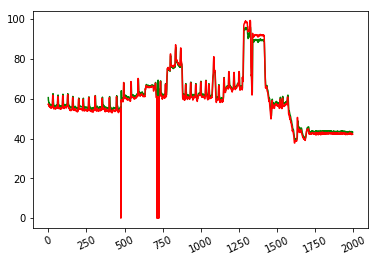

In [73]:
plt.plot(yhat_stack_lstm,color='green')
plt.plot(test_op_stack,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_op_stack,yhat_stack_lstm)
print(Error)

16.194198204497


# Bidirectional LSTM

In [75]:
train_data_bidirectional=my_data[0:7500]
print(train_data_bidirectional.shape)
test_data_bidirectional=my_data[7500:]
print(test_data_bidirectional.shape)

(7500, 1)
(2000, 1)


In [78]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

n_steps_bidirectional = 3
# split into samples
X_train_bidirectional, y_train_bidirectional = split_sequence(train_data_bidirectional, n_steps_bidirectional)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features_bidirectional = 1
X_train_bidirectional = X_train_bidirectional.reshape((X_train_bidirectional.shape[0], X_train_bidirectional.shape[1], n_features_bidirectional))

In [79]:
from keras.layers import Bidirectional
def bidirectional_lstm():
    model = Sequential()
    model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps_bidirectional, n_features_bidirectional)))
    model.add(Dense(1))
    return model

bi_lstm=bidirectional_lstm()
bi_lstm.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
bi_lstm.fit(X_train_bidirectional, y_train_bidirectional, epochs=10, verbose=1)

Epoch 1/10
7497/7497 [==============================] - 3s 379us/step - loss: 420.2028 - acc: 0.0000e+00
Epoch 2/10
7497/7497 [==============================] - 1s 141us/step - loss: 15.9800 - acc: 0.0000e+00
Epoch 3/10
7497/7497 [==============================] - 1s 150us/step - loss: 15.5845 - acc: 0.0000e+00
Epoch 4/10
7497/7497 [==============================] - 1s 170us/step - loss: 15.1818 - acc: 0.0000e+00
Epoch 5/10
7497/7497 [==============================] - 1s 153us/step - loss: 14.9869 - acc: 0.0000e+00
Epoch 6/10
7497/7497 [==============================] - 1s 185us/step - loss: 15.1939 - acc: 0.0000e+00
Epoch 7/10
7497/7497 [==============================] - 1s 152us/step - loss: 14.8777 - acc: 0.0000e+00
Epoch 8/10
7497/7497 [==============================] - 1s 151us/step - loss: 14.8103 - acc: 0.0000e+00
Epoch 9/10
7497/7497 [==============================] - 1s 195us/step - loss: 14.9742 - acc: 0.0000e+00
Epoch 10/10
7497/7497 [==============================] - 1s 160

In [81]:
test_ip_bidirectional, test_op_bidirectional = split_sequence(test_data_bidirectional, n_steps_bidirectional)
test_ip_bidirectional =test_ip_bidirectional.reshape((test_ip_bidirectional.shape[0], test_ip_bidirectional.shape[1], n_features_bidirectional))

In [82]:
yhat_bi_lstm = bi_lstm.predict(test_ip_bidirectional, verbose=1)
print(yhat_bi_lstm)

1997/1997 [==============================] - 1s 288us/step
[[60.28669 ]
 [58.0683  ]
 [58.080963]
 ...
 [42.37357 ]
 [42.419647]
 [42.650623]]


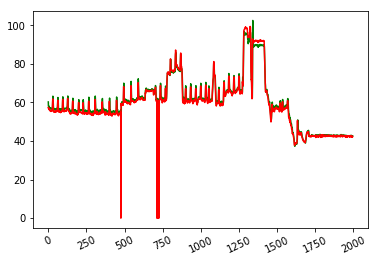

In [83]:
plt.plot(yhat_bi_lstm,color='green')
plt.plot(test_op_bidirectional,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

In [84]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_op_bidirectional,yhat_bi_lstm)
print(Error)

16.874317193349103


# CNN LSTM

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_1 = 4
# split into samples
X_cnn_lstm, y_cnn_lstm = split_sequence(train_data, n_steps_1)
# tr=X_cnn_lstm[0:7500]
# te=X_cnn_lstm[7500:]
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps_2 = 2
# X_cnn_lstm_train = X_cnn_lstm.reshape((X_cnn_lstm.shape[0], n_seq, n_steps, n_features))
X_cnn_lstm_train = X_cnn_lstm.reshape((X_cnn_lstm.shape[0], n_seq, n_steps_2, n_features))
print(X_cnn_lstm_train.shape)

In [ ]:
# define model
def cnn_lstm():
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps_2, n_features)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    return model
cnn_lstm=cnn_lstm()
cnn_lstm.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

# fit model
cnn_lstm.fit(X_cnn_lstm_train, y_cnn_lstm, epochs=10, verbose=1)

In [ ]:
print(train_data.shape)
print(X_cnn_lstm.shape)
print(y_cnn_lstm.shape)

In [ ]:
X_cnn_lstm_test, y_cnn_lstm_test = split_sequence(test_data, n_steps_1)
print(test_data.shape)
print(X_cnn_lstm_test.shape)
X_cnn_lstm_test_ip = X_cnn_lstm_test.reshape((X_cnn_lstm_test.shape[0],n_seq, n_steps_2, n_features))
print(X_cnn_lstm_test_ip.shape)

In [ ]:
# X_cnn_lstm_test = test_data.reshape((test_data.shape[0], n_seq, n_steps, n_features))
yhat = cnn_lstm.predict(X_cnn_lstm_test_ip, verbose=1)
print(yhat.shape)

In [ ]:
print(y_cnn_lstm_test.shape)

# ConvLSTM

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_1 = 4
# split into samples
X_Conv_Lstm, y_Conv_Lstm = split_sequence(train_data, n_steps_1)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps_2 = 2
X_Conv_Lstm_train = X_Conv_Lstm.reshape((X_Conv_Lstm.shape[0], n_seq, 1, n_steps_2, n_features))

In [ ]:
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps_2, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_Conv_Lstm_train, y_Conv_Lstm, epochs=10, verbose=1)

In [ ]:
# demonstrate prediction
# x_input = array([60, 70, 80, 90])
X_Conv_Lstm_test, y_Conv_Lstm_test = split_sequence(test_data, n_steps_1)

x_input = X_Conv_Lstm_test.reshape((X_Conv_Lstm_test.shape[0], n_seq, 1, n_steps_2, n_features))
yhat = model.predict(x_input, verbose=1)
print(yhat)

In [ ]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(y_Conv_Lstm_test,yhat)
print(Error)

In [ ]:
# plt.plot(yhat,color='green')
plt.plot(y_Conv_Lstm_test,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

# Multiple input time series

In [14]:
multiple_time_series=test_new.loc[500:9999,['dateTime','AEWIHOAVABV2','AEDATZ_HO_V0','RWWIHOA_HWT0','AEDAHO_T9_V2']]

In [15]:
multiple_time_series = multiple_time_series.set_index('dateTime')

In [16]:
multiple_time_series=multiple_time_series.loc[::-1]

In [17]:
multiple_time_matrix=multiple_time_series.as_matrix()

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [32]:
# print(multiple_time_series)
multiple_time_series.tail()

,AEWIHOAVABV2,AEDATZ_HO_V0,RWWIHOA_HWT0,AEDAHO_T9_V2
dateTime,,,,
2019-04-11 11:29:00,80.056771,29.099978,91.314595,42.292350
2019-04-11 11:30:00,80.273953,30.584083,91.070699,42.108748
2019-04-11 11:31:00,80.248003,32.296527,91.087722,42.343193
2019-04-11 11:32:00,80.112264,34.384378,91.007505,42.480315
2019-04-11 11:33:00,80.287128,36.275050,91.094201,42.305187


In [33]:
multiple_ip_train_data=multiple_time_matrix[0:7500]
print(multiple_ip_train_data.shape)
multiple_ip_test_set=multiple_time_matrix[7500:]
# print(multiple_ip_test_set.shape)
# # print(multiple_ip_train_data)
# mul_test_ip=multiple_ip_test_set[:,:-1]
# print(mul_test_ip)
# mul_actual_op=multiple_ip_test_set[:,-1]
# print(mul_actual_op)

(7500, 4)
(2000, 4)
[[68.19199859 36.10161919 87.10032319]
 [68.20237862 35.71418436 87.47143814]
 [68.32614051 34.36447664 87.37500958]
 ...
 [80.24800284 32.29652695 91.0877219 ]
 [80.112264   34.38437835 91.00750489]
 [80.28712757 36.27504965 91.09420059]]
[62.69282399 61.68225878 58.95471276 ... 42.343193   42.48031501
 42.30518655]


In [40]:
from numpy import array
# from numpy import hstack
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
# in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
# in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
# out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
# in_seq1 = in_seq1.reshape((len(in_seq1), 1))
# in_seq2 = in_seq2.reshape((len(in_seq2), 1))
# out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
# dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X_multiple_ip, y_multiple_ip = split_sequences(multiple_ip_train_data, n_steps)
print(X_multiple_ip.shape, y_multiple_ip.shape)
# summarize the data
# for i in range(len(X)):
# 	print(X[i], y[i])

(7498, 3, 3) (7498,)


In [25]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

n_features = X_multiple_ip.shape[2]
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
model.fit(X_multiple_ip, y_multiple_ip, epochs=10, verbose=1)

Epoch 1/10
7498/7498 [==============================] - 1s 190us/step - loss: 144.6518 - acc: 0.0000e+00
Epoch 2/10
7498/7498 [==============================] - 1s 86us/step - loss: 17.9066 - acc: 0.0000e+00
Epoch 3/10
7498/7498 [==============================] - 1s 88us/step - loss: 14.1338 - acc: 0.0000e+00
Epoch 4/10
7498/7498 [==============================] - 1s 88us/step - loss: 12.0084 - acc: 0.0000e+00
Epoch 5/10
7498/7498 [==============================] - 1s 89us/step - loss: 11.0767 - acc: 0.0000e+00
Epoch 6/10
7498/7498 [==============================] - 1s 97us/step - loss: 10.3199 - acc: 0.0000e+00
Epoch 7/10
7498/7498 [==============================] - 1s 127us/step - loss: 10.4532 - acc: 0.0000e+00
Epoch 8/10
7498/7498 [==============================] - 1s 92us/step - loss: 9.6889 - acc: 0.0000e+00
Epoch 9/10
7498/7498 [==============================] - 1s 90us/step - loss: 9.5388 - acc: 0.0000e+00
Epoch 10/10
7498/7498 [==============================] - 1s 95us/step - 

In [34]:
X_multiple_test_ip, y_multiple_test_op = split_sequences(multiple_ip_test_set, n_steps)
print(X_multiple_test_ip.shape)

(1998, 3, 3)


In [35]:
# demonstrate prediction
# x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = X_multiple_test_ip.reshape((X_multiple_test_ip.shape[0], n_steps, n_features))
yhat = model.predict(x_input, verbose=1)
print(yhat)

1998/1998 [==============================] - 0s 88us/step
[[59.94709 ]
 [58.933353]
 [58.55521 ]
 ...
 [54.908497]
 [59.952873]
 [63.634624]]


In [36]:
print(y_multiple_test_op)

[58.95471276 57.32093474 57.48758521 ... 42.343193   42.48031501
 42.30518655]


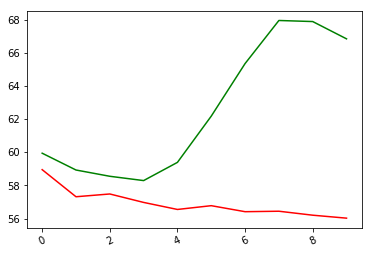

In [45]:
plt.plot(yhat[0:10],color='green')
plt.plot(y_multiple_test_op[0:10],color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

In [42]:
print(yhat.shape)
print(y_multiple_test_op.shape)

(1998, 1)
(1998,)
